In [39]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

In [6]:
df = pd.read_csv('data/campaign/campaign_sampled_df_verbalised_english.csv')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6651 entries, 0 to 6650
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   entity_id                6651 non-null   object 
 1   claim_id                 6651 non-null   object 
 2   rank                     6651 non-null   object 
 3   property_id              6651 non-null   object 
 4   datatype                 6651 non-null   object 
 5   datavalue                6651 non-null   object 
 6   sampling_weight_vb       6651 non-null   object 
 7   sampling_weight          6651 non-null   float64
 8   entity_label             6651 non-null   object 
 9   property_label           6651 non-null   object 
 10  object_label             6651 non-null   object 
 11  theme_entity_id          6651 non-null   object 
 12  theme_entity_label       6651 non-null   object 
 13  entity_desc              6651 non-null   object 
 14  property_desc           

In [71]:
df_cg = [df[df['campaign_group'] == i] for i in df.campaign_group.unique()]

In [80]:
df.property_label.unique().shape[0]

436

<AxesSubplot:>

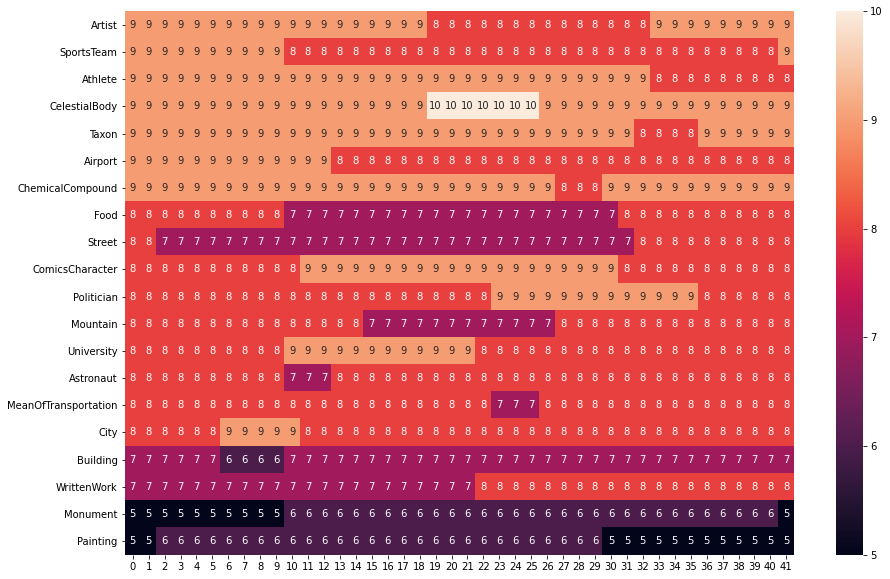

In [68]:
count_matrix = np.empty((len(df_cg), df.theme_entity_label.unique().shape[0]))
ix = df_cg[0].theme_entity_label.value_counts().index
for i in range(42):
    count_matrix[i,:] = df_cg[i].theme_entity_label.value_counts()[ix].values
    
count_matrix = pd.DataFrame(count_matrix)
count_matrix.columns = ix

fig, ax = plt.subplots(1,1,figsize=(15,10))
sns.heatmap(count_matrix.T, ax=ax, annot=True)
# LETS TAKE RANDOMLY

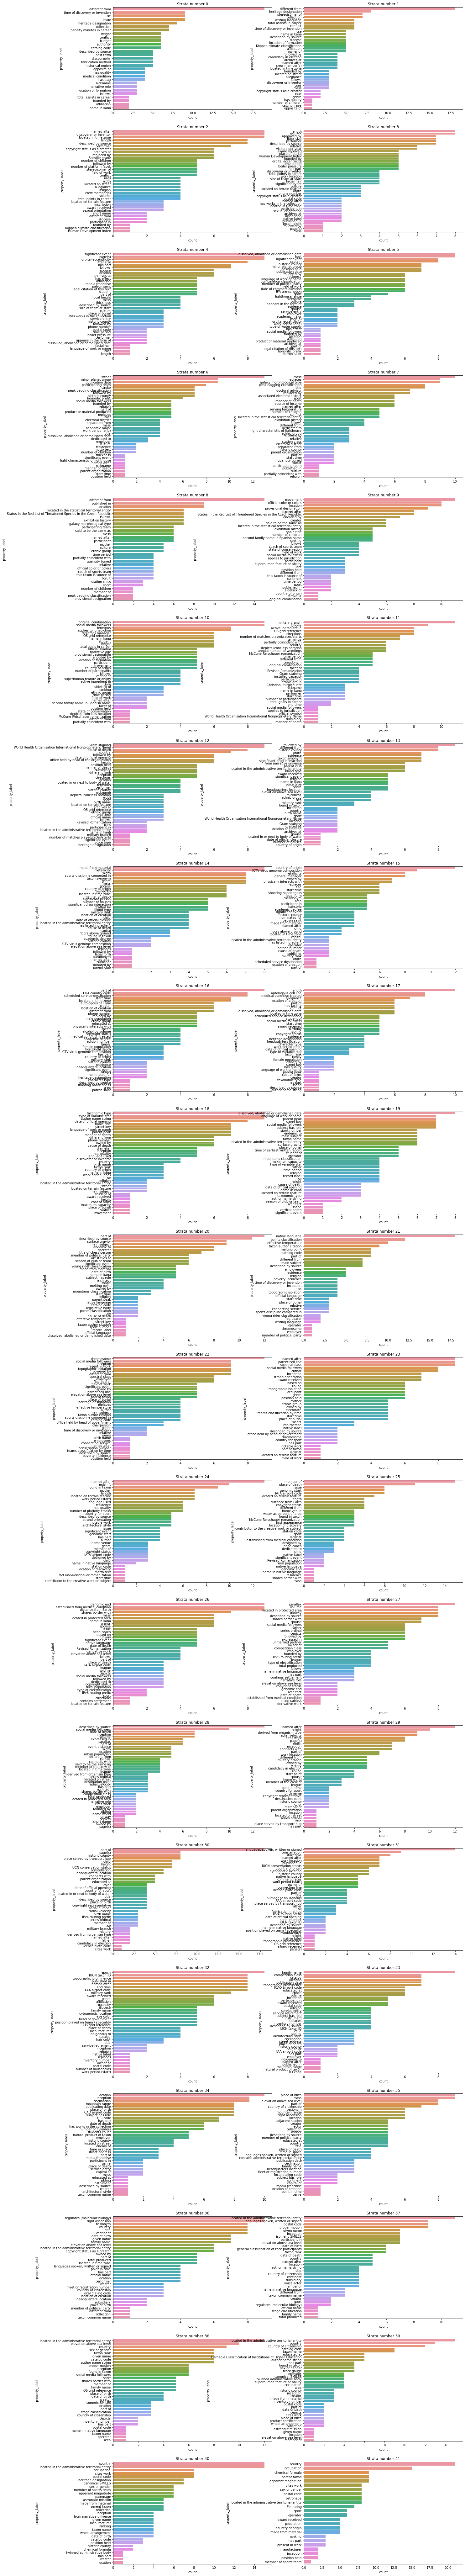

In [130]:
fig, ax = plt.subplots(len(df_cg)//2,2,figsize=(20,150))
for i in range(len(df_cg)):
    sns.countplot(
        data = df_cg[i],
        y='property_label',
        orient='h',
        order=df_cg[i].property_label.value_counts().index,
        ax=ax[i//2,i%2],
        
    ).set_title(f'Strata number {i}')
    #break

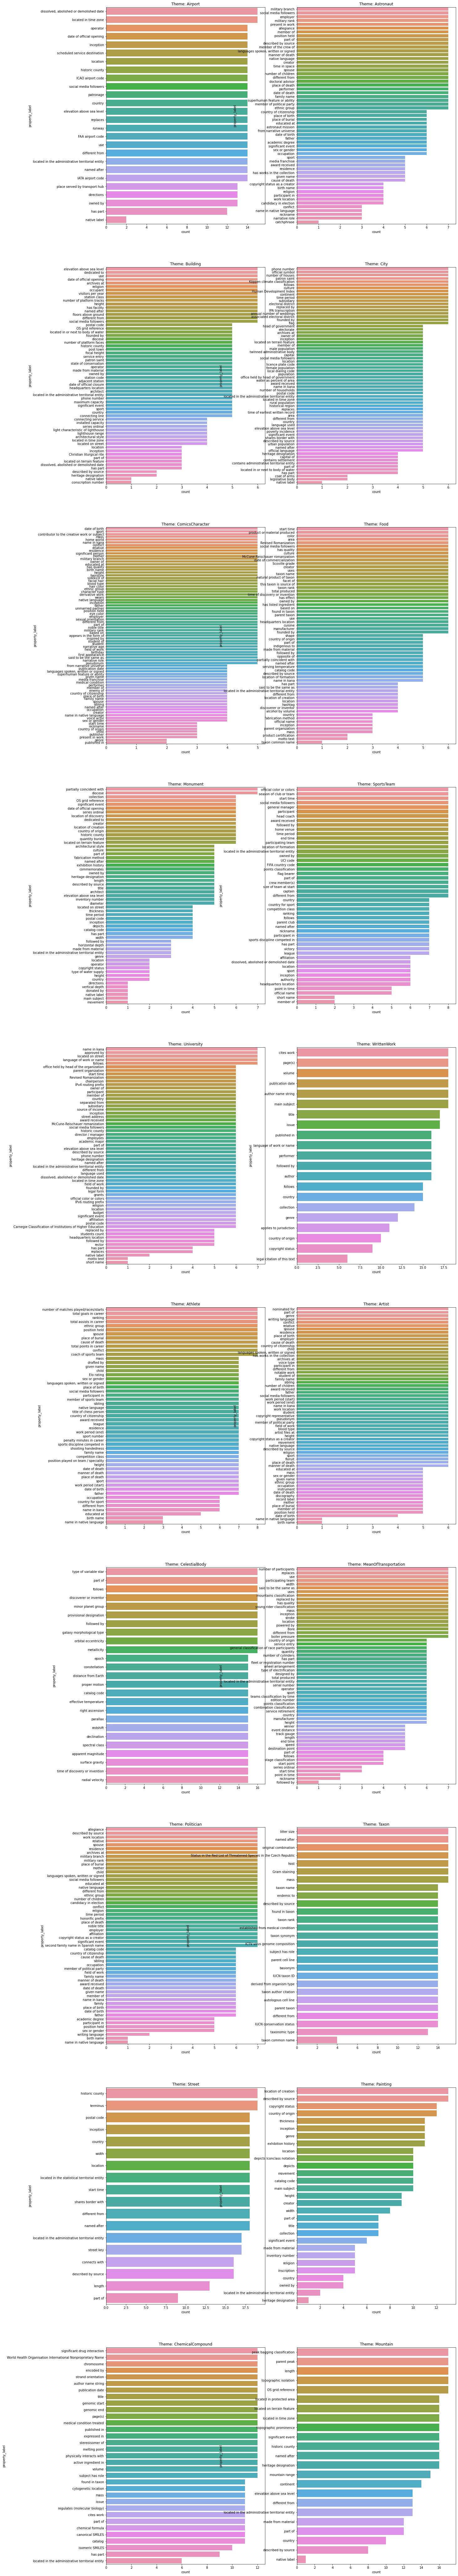

In [145]:
df_theme = [{'label':theme, 'df': df[df.theme_entity_label == theme]} for theme in df.theme_entity_label.unique()]
    
fig, ax = plt.subplots(len(df_theme)//2,2,figsize=(20,150))
for i in range(len(df_theme)):
    sns.countplot(
        data = df_theme[i]['df'],
        y='property_label',
        orient='h',
        order=df_theme[i]['df'].property_label.value_counts().index,
        ax=ax[i//2,i%2],

    ).set_title(f'Theme: {df_theme[i]["label"]}')

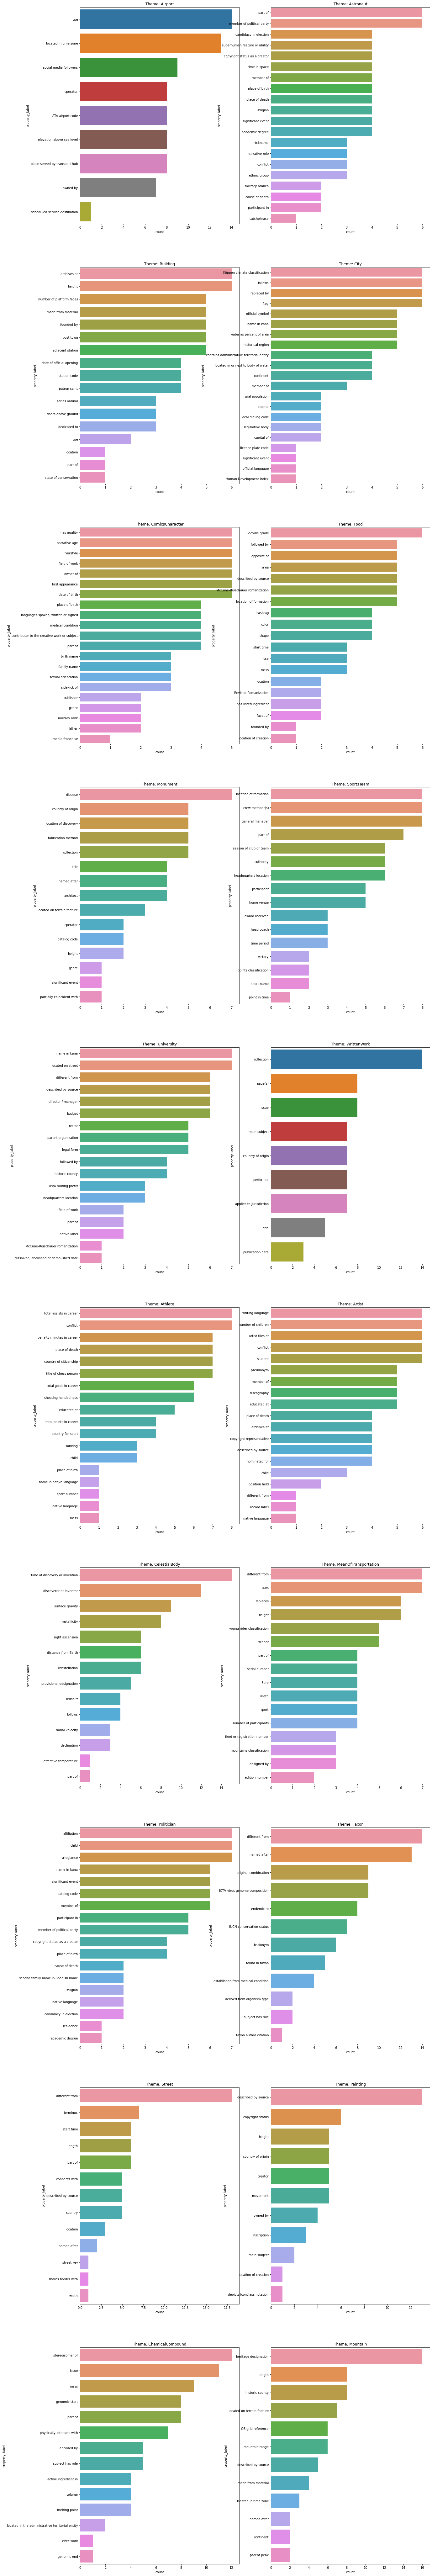

In [165]:
selected_cgs = [0,1,2,10,15,20,25,30,35]
df_selected_cgs = df[df.campaign_group.apply(lambda x : x in selected_cgs)]
df_theme = [{'label':theme, 'df': df_selected_cgs[df_selected_cgs.theme_entity_label == theme]} for theme in df_selected_cgs.theme_entity_label.unique()]
    
fig, ax = plt.subplots(len(df_theme)//2,2,figsize=(20,150))
for i in range(len(df_theme)):
    sns.countplot(
        data = df_theme[i]['df'],
        y='property_label',
        orient='h',
        order=df_theme[i]['df'].property_label.value_counts().index,
        ax=ax[i//2,i%2],

    ).set_title(f'Theme: {df_theme[i]["label"]}')

<AxesSubplot:xlabel='count', ylabel='property_label'>

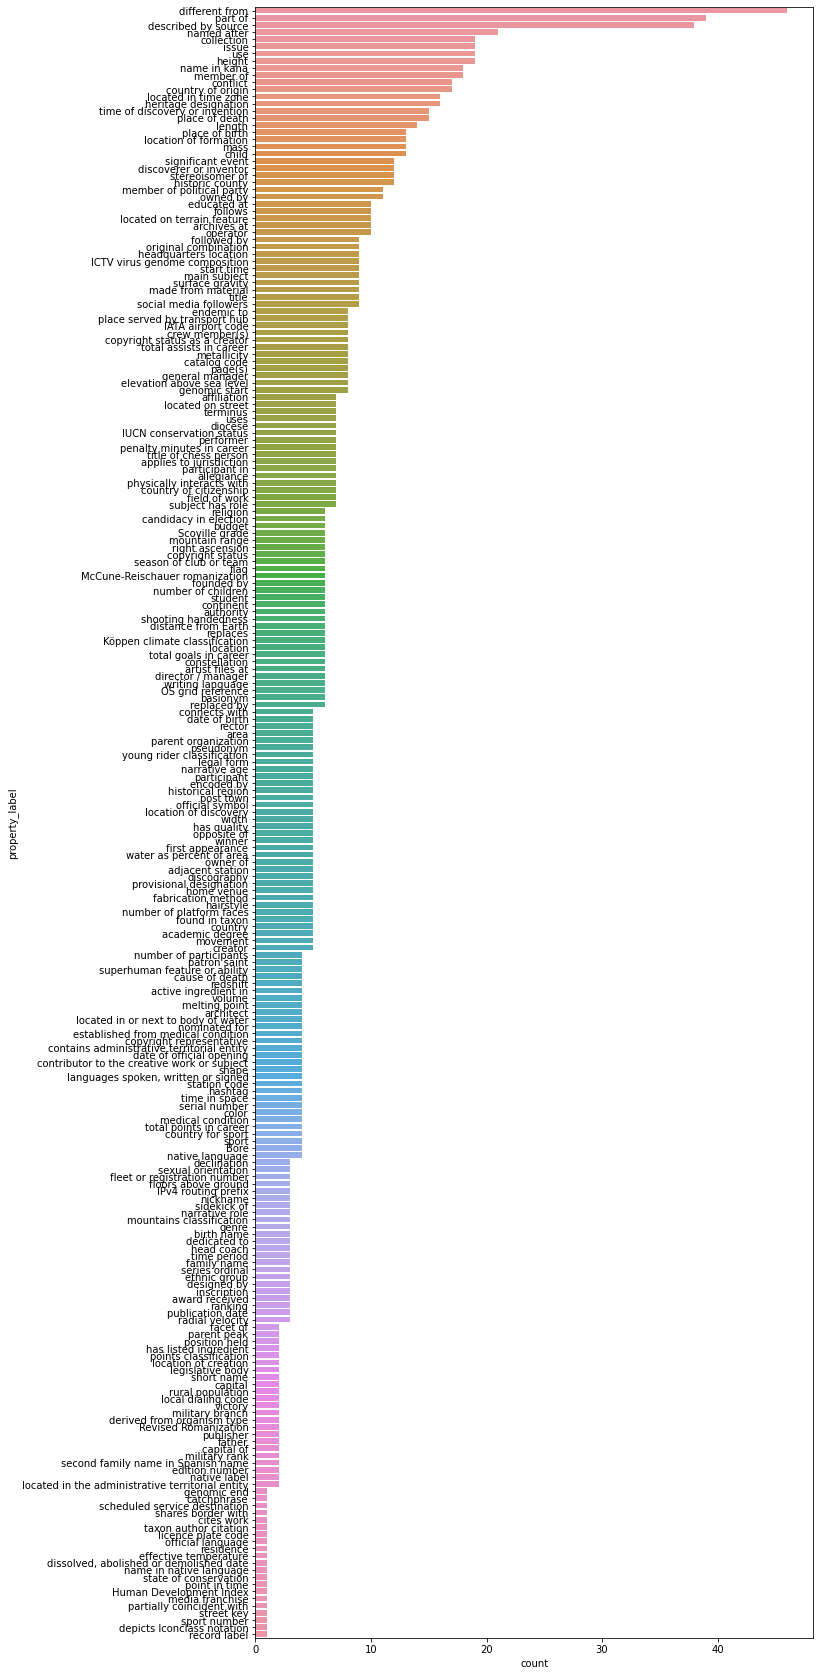

In [163]:
selected_cgs = [0,1,2,10,15,20,25,30,35]
df_selected_cgs = df[df.campaign_group.apply(lambda x : x in selected_cgs)]

fig, ax = plt.subplots(1,1,figsize=(10,30))
sns.countplot(
        data = df_selected_cgs,
        y='property_label',
        orient='h',
        order=df_selected_cgs.property_label.value_counts().index,
        ax=ax
    )